3. Support Vector Machine - Linear Kernel
SHAILJA PATIL
24CS60R49

In [1]:
import pandas as pd
df =pd.read_csv('test.csv')
print(df.head())


                                               tweet label
0  The CDC currently reports 99031 deaths. In gen...  real
1  States reported 1121 deaths a small rise from ...  real
2  Politically Correct Woman (Almost) Uses Pandem...  fake
3  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4  Populous states can generate large case counts...  real


DATA PREPROCESSING AND data split : train_split.csv test_split.csv val_split.csv TAKIN FROM PART 1 KNN

In [2]:
# Import the necessary libraries for TF-IDF VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
train_data = pd.read_csv('train_split.csv')
val_data = pd.read_csv('val_split.csv')
test_data = pd.read_csv('test_split.csv')
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  #  max_features set to 5000

# Fit and transform the training data to obtain TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text'])

# Transform the validation and test data using the same fitted vectorizer
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text'])

# Optionally, check the shape of the transformed data
print(f"TF-IDF Training Data Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Validation Data Shape: {X_val_tfidf.shape}")
print(f"TF-IDF Test Data Shape: {X_test_tfidf.shape}")

TF-IDF Training Data Shape: (8480, 5000)
TF-IDF Validation Data Shape: (1060, 5000)
TF-IDF Test Data Shape: (1060, 5000)


SVM

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [4]:
y_train = train_data['label']  # Assuming 'label' is the column with 0: fake, 1: real
y_val = val_data['label']
y_test = test_data['label']

# Initialize SVM model with a linear kernel
svm_model = SVC(kernel='linear')
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Perform GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
# Best model
best_svm = grid_search.best_estimator_
# Predictions
y_pred = best_svm.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.9226
              precision    recall  f1-score   support

        fake       0.94      0.89      0.92       496
        real       0.91      0.95      0.93       564

    accuracy                           0.92      1060
   macro avg       0.92      0.92      0.92      1060
weighted avg       0.92      0.92      0.92      1060



CONFUSION MATRIX

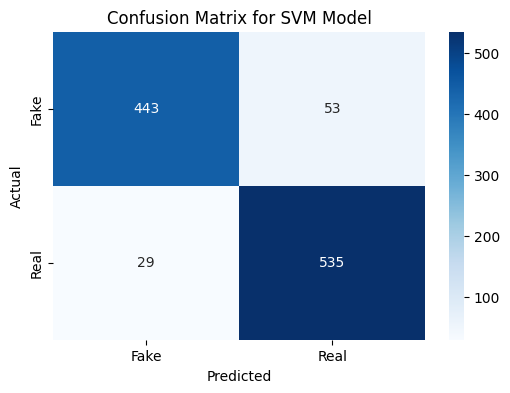

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# TO Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# TO Display confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()
